In [24]:
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import requests
import datetime
import time
import glob
import ast
import re
import os
import numpy as np
import pandas as pd


In [2]:
start_time = time.time()

## Assume, we need cars with price range 10-100 thousand dollars, which are manifactured in 2023 year

In [3]:
url = 'https://kolesa.kz/cars/?_sys-hasphoto=2&auto-custom=2&sort_by=price-asc&auto-car-order=1&year[from]=2023&price[from]=4600000&price[to]=46000000'

# running selenium web driver
driver = webdriver.Firefox()
driver.get(url)

# pagination
pagination = driver.find_element(By.XPATH, '//div[contains(@class, "pager")]')
pages = pagination.find_elements(By.TAG_NAME, "li")
last_page = int(pages[-1].text)
current_page = 1

# creating column names for dataframe
weblink = []
price = []
ad_date = []
ad_views = []
brand = []
model = []
year = []
params = []

# screaning pages and every ads in them
while current_page <= last_page:    
    container = driver.find_element(By.XPATH, '//div[@class="a-list"]')
    ads = container.find_elements(By.XPATH, '//div[@class="a-list__item"]')
    j = 0
    
    for i, ad in enumerate(ads):
        time.sleep(2)
        link = ad.find_elements(By.XPATH,'//a[@class="a-card__link"]')[j].get_attribute('href')
        weblink.append(link)
        j += 2
        price.append(ad.find_elements(By.XPATH,'//span[@class="a-card__price"]')[i].text)
        ad_date.append(ad.find_elements(By.XPATH,'//span[@class="a-card__param a-card__param--date"]')[i].text)
        ad_views.append(ad.find_elements(By.XPATH,'//span[@class="a-card__views nb-views"]')[i].text)
        driver.execute_script("window.open('');")
        driver.switch_to.window(driver.window_handles[1])
        try:
            driver.get(link)
        
            header = driver.find_element(By.XPATH, '//div[@class="offer__header-wrap"]')

            brand.append(header.find_element(By.XPATH,'//span[@itemprop="brand"]').text)
            try:
                model.append(header.find_element(By.XPATH,'//span[@itemprop="name"]').text)
            except NoSuchElementException:
                model.append(None)
            year.append(header.find_element(By.XPATH,'//span[@class="year"]').text)

            parameters = driver.find_element(By.XPATH, '//div[@class="offer__parameters"]')

            parameter_names = parameters.find_elements(By.XPATH, '//dt[@class="value-title"]')
            parameter_values = parameters.find_elements(By.XPATH, '//dd[@class="value"]')
            params.append({parameter_names[i].text: parameter_values[i].text for i in range(len(parameter_names))})

            time.sleep(3)
            driver.close()
            driver.switch_to.window(driver.window_handles[0])
        except:
            brand.append(None)
            model.append(None)
            year.append(None)
            params.append(None)
            driver.close()
            driver.switch_to.window(driver.window_handles[0])
            
    current_page += 1
    if current_page % 10 == 0:
        print(f'Page № -{current_page}')
        print(f'Тumber of ads - {len(model)}')
        print(str(datetime.timedelta(seconds=(time.time()-start_time))))

    try:
        next_page = driver.find_element(By.XPATH, '//span[contains(@class, "pag-next-page")]')
        next_page.click()
    except:
        pass
end_time = time.time()
print(str(datetime.timedelta(seconds=(end_time-start_time))))
driver.quit()

Page № -10
Тumber of ads - 180
0:23:05.249249
Page № -20
Тumber of ads - 380
0:48:23.885162
Page № -30
Тumber of ads - 580
1:13:24.781196
Page № -40
Тumber of ads - 780
1:37:26.818758
Page № -50
Тumber of ads - 980
2:01:45.934261
Page № -60
Тumber of ads - 1180
2:25:34.314173
Page № -70
Тumber of ads - 1380
2:54:36.694687
Page № -80
Тumber of ads - 1580
3:19:06.233203
Page № -90
Тumber of ads - 1780
3:49:04.956373
Page № -100
Тumber of ads - 1980
4:14:32.586132
Page № -110
Тumber of ads - 2180
4:39:11.000595
Page № -120
Тumber of ads - 2380
5:04:10.203463
Page № -130
Тumber of ads - 2580
5:33:09.933781
Page № -140
Тumber of ads - 2780
5:57:49.043854
Page № -150
Тumber of ads - 2980
6:22:32.876478
Page № -160
Тumber of ads - 3180
6:53:08.784144
Page № -170
Тumber of ads - 3380
7:18:00.958774
Page № -180
Тumber of ads - 3580
7:42:13.528471
Page № -190
Тumber of ads - 3780
8:14:16.808886
8:29:25.445203


In [4]:
print(len(weblink))
print(len(price))
print(len(ad_date))
print(len(ad_views))
print(len(brand))
print(len(model))
print(len(year))
print(len(params))

3911
3911
3911
3911
3911
3911
3911
3911


In [5]:
df_kolesa = pd.DataFrame({'weblink':weblink, 'price':price, 'ad_date':ad_date, 'ad_views':ad_views,
                          'brand':brand, 'model':model, 'year':year, 'params':params})
df_kolesa.to_csv('cars_2023.csv', index=False)
df_kolesa

,weblink,price,ad_date,ad_views,brand,model,year,params
0,https://kolesa.kz/a/show/155013553,5 350 000 ₸,29 июня,828,ВАЗ (Lada),Granta 2190 (седан),2023,"{'Город': 'Уральск', 'Поколение': '2018 - н.в...."
1,https://kolesa.kz/a/show/155157813,5 455 000 ₸,3 июля,527,ВАЗ (Lada),Granta 2190 (седан),2023,"{'Город': 'Астана', 'Поколение': '2018 - н.в. ..."
2,https://kolesa.kz/a/show/155241750,5 530 000 ₸,2 июля,659,ВАЗ (Lada),Granta 2191 (лифтбек),2023,"{'Город': 'Актобе', 'Поколение': '2018 - н.в. ..."
3,https://kolesa.kz/a/show/155413626,5 530 000 ₸,2 июля,598,ВАЗ (Lada),Granta 2190 (седан),2023,"{'Город': 'Кызылорда', 'Поколение': '2018 - н...."
4,https://kolesa.kz/a/show/155235040,5 530 000 ₸,2 июля,2108,ВАЗ (Lada),Granta 2190 (седан),2023,"{'Город': 'Астана', 'Поколение': '2018 - н.в. ..."
...,...,...,...,...,...,...,...,...
3906,https://kolesa.kz/a/show/155455709,45 000 000 ₸,28 июня,160,Kia,Carnival,2023,"{'Город': 'Алматы', 'Поколение': '2020 - н.в. ..."
3907,https://kolesa.kz/a/show/153255559,45 100 000 ₸,29 июня,4860,BMW,530,2023,"{'Город': 'Алматы', 'Поколение': '2020 - н.в. ..."
3908,https://kolesa.kz/a/show/153741527,46 000 000 ₸,29 июня,53,BMW,X4,2023,"{'Город': 'Костанай', 'Поколение': '2021 - н.в..."
3909,https://kolesa.kz/a/show/155611870,46 000 000 ₸,2 июля,57,Lexus,RX 500h,2023,"{'Город': 'Алматы', 'Поколение': '2022 - н.в. ..."


## Then, if you want to get more data, simply replace the url at the beginning of the notebook (as many times as you need) and then combine all data into one.

In [6]:
extension = 'csv'
all_filenames = [i for i in glob.glob('cars_*.{}'.format(extension))]
all_filenames

['cars_2023.csv']

# Data cleansing

In [7]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
#export to csv
combined_csv.to_csv("combined_by_years/kolesa_raw_data.csv", index=False, encoding='utf-8-sig')
#dropping duplicates and rows with null values
combined_csv.drop_duplicates(inplace=True)
combined_csv.dropna(inplace=True)
#resetting indexes
print(f'old indexes: {combined_csv.index}')
combined_csv.reset_index(inplace=True, drop=True)
print(f'new indexes: {combined_csv.index}')

old indexes: Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3901, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 3910],
           dtype='int64', length=3907)
new indexes: RangeIndex(start=0, stop=3907, step=1)


# Exploring data information
Following cells shows the initial state and helps to get overall view of the raw data. The data is distributed along eight columns, namely: -weblink; -price; -ad_date; -ad_views; -brand; -model; -year; -and other parameters stored in dictionaries.

The info method shows that data consists of data types such as float64, int64, and objects.

In [8]:
combined_csv.shape

(3907, 8)

In [9]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   weblink   3907 non-null   object 
 1   price     3907 non-null   object 
 2   ad_date   3907 non-null   object 
 3   ad_views  3907 non-null   int64  
 4   brand     3907 non-null   object 
 5   model     3907 non-null   object 
 6   year      3907 non-null   float64
 7   params    3907 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 244.3+ KB


In [10]:
combined_csv.describe()

,ad_views,year
count,3907.000000,3907.000000
mean,2284.396980,2022.998976
std,5895.848899,0.063994
min,0.000000,2019.000000
25%,98.000000,2023.000000
50%,394.000000,2023.000000
75%,1870.000000,2023.000000
max,113090.000000,2023.000000


In [11]:
combined_csv['dict_params'] = combined_csv.apply(lambda row : ast.literal_eval(row['params']), axis = 1)
combined_csv.drop(columns=['params'], inplace=True)
combined_csv[['city', 
     'generation', 
     'body',
     'engine',
     'mileage', 
     'transmission', 
     'drivetrain', 
     'drive', 
     'body_color', 
     'customs_cleared',
     'engine_volume',
     'fuel_type',
     'damaged'
    ]] = pd.DataFrame([
    [None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None]], index=combined_csv.index)

In [12]:
df = combined_csv.copy()

In [13]:
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('₸', '').replace(' ', ''))
    return(x)

In [16]:
df

,weblink,price,ad_date,ad_views,brand,model,year,dict_params,city,generation,...,engine,mileage,transmission,drivetrain,drive,body_color,customs_cleared,engine_volume,fuel_type,damaged
0,https://kolesa.kz/a/show/155013553,5 350 000 ₸,29 июня,828,ВАЗ (Lada),Granta 2190 (седан),2023.0,"{'Город': 'Уральск', 'Поколение': '2018 - н.в....",Уральск,2018 - н.в. 1 поколение рестайлинг,...,1.6 (бензин),2 600,механика,передний привод,слева,черный,Да,1.6,бензин,None
1,https://kolesa.kz/a/show/155157813,5 455 000 ₸,3 июля,527,ВАЗ (Lada),Granta 2190 (седан),2023.0,"{'Город': 'Астана', 'Поколение': '2018 - н.в. ...",Астана,2018 - н.в. 1 поколение рестайлинг,...,1.6 (бензин),200,механика,передний привод,слева,черный металлик,Да,1.6,бензин,None
2,https://kolesa.kz/a/show/155241750,5 530 000 ₸,2 июля,659,ВАЗ (Lada),Granta 2191 (лифтбек),2023.0,"{'Город': 'Актобе', 'Поколение': '2018 - н.в. ...",Актобе,2018 - н.в. 1 поколение рестайлинг,...,1.6 (бензин),10,механика,передний привод,слева,белый,Да,1.6,бензин,None
3,https://kolesa.kz/a/show/155413626,5 530 000 ₸,2 июля,598,ВАЗ (Lada),Granta 2190 (седан),2023.0,"{'Город': 'Кызылорда', 'Поколение': '2018 - н....",Кызылорда,2018 - н.в. 1 поколение рестайлинг,...,1.6 (бензин),None,механика,передний привод,слева,None,Да,1.6,бензин,None
4,https://kolesa.kz/a/show/155235040,5 530 000 ₸,2 июля,2108,ВАЗ (Lada),Granta 2190 (седан),2023.0,"{'Город': 'Астана', 'Поколение': '2018 - н.в. ...",Астана,2018 - н.в. 1 поколение рестайлинг,...,1.6 (бензин),None,механика,передний привод,слева,None,Да,1.6,бензин,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,https://kolesa.kz/a/show/155455709,45 000 000 ₸,28 июня,160,Kia,Carnival,2023.0,"{'Город': 'Алматы', 'Поколение': '2020 - н.в. ...",Алматы,2020 - н.в. 4 поколение (KA4),...,3.5 (бензин),None,автомат,передний привод,слева,черный металлик,Да,3.5,бензин,None
3903,https://kolesa.kz/a/show/153255559,45 100 000 ₸,29 июня,4860,BMW,530,2023.0,"{'Город': 'Алматы', 'Поколение': '2020 - н.в. ...",Алматы,2020 - н.в. G30 рестайлинг,...,2 (бензин),None,автомат,полный привод,слева,серебристый металлик,Да,2,бензин,None
3904,https://kolesa.kz/a/show/153741527,46 000 000 ₸,29 июня,53,BMW,X4,2023.0,"{'Город': 'Костанай', 'Поколение': '2021 - н.в...",Костанай,2021 - н.в. G02 рестайлинг (G02/F98),...,2 (бензин),None,автомат,полный привод,слева,вишня,Да,2,бензин,None
3905,https://kolesa.kz/a/show/155611870,46 000 000 ₸,2 июля,57,Lexus,RX 500h,2023.0,"{'Город': 'Алматы', 'Поколение': '2022 - н.в. ...",Алматы,2022 - н.в. 5 поколение,...,2.4 (бензин),None,автомат,полный привод,слева,черный,Да,2.4,бензин,None


In [ ]:
for i in range(df.shape[0]):
    for k, v in df.iloc[i]['dict_params'].items():
        if k == 'Город':
            df.loc[i,'city'] = v
        elif k == 'Поколение':
            df.loc[i,'generation'] = v
        elif k == 'Кузов':
            df.loc[i,'body'] = v
        elif k == 'Объем двигателя, л':
            df.loc[i,'engine'] = v
            pattern = re.compile(r'^(?P<volume>[0-9.]{1,4}) \((?P<fuel>[а-я-]+)\)$')
            match = pattern.search(v)
            if match:
                df.loc[i,'engine_volume'] = match.group('volume')
                df.loc[i,'fuel_type'] = match.group('fuel')
            else:
                pass
        elif k == 'Пробег':
            pattern = re.compile(r'^(?P<mileage>[0-9 ]+)')
            match = pattern.search(v)
            if match:
                df.loc[i,'mileage'] = match.group('mileage').strip()
            else:
                pass
        elif k == 'Коробка передач':
            df.loc[i,'transmission'] = v
        elif k == 'Привод':
            df.loc[i,'drivetrain'] = v
        elif k == 'Руль':
            df.loc[i,'drive'] = v
        elif k == 'Цвет':
            df.loc[i,'body_color'] = v
        elif k == 'Растаможен в Казахстане':
            df.loc[i,'customs_cleared'] = v
    if i%500 == 0:
        print(i)


In [ ]:
df['price'] = df['price'].apply(clean_currency).astype('float')
df['engine_volume'] = df['engine_volume'].astype('float')
df['mileage'] = df['mileage'].apply(clean_currency).astype('float')
df['damaged'] = df['damaged'].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   weblink          3907 non-null   object 
 1   price            3907 non-null   float64
 2   ad_date          3907 non-null   object 
 3   ad_views         3907 non-null   int64  
 4   brand            3907 non-null   object 
 5   model            3907 non-null   object 
 6   year             3907 non-null   float64
 7   dict_params      3907 non-null   object 
 8   city             3907 non-null   object 
 9   generation       3906 non-null   object 
 10  body             3907 non-null   object 
 11  engine           3495 non-null   object 
 12  mileage          2117 non-null   float64
 13  transmission     3901 non-null   object 
 14  drivetrain       3901 non-null   object 
 15  drive            3907 non-null   object 
 16  body_color       3043 non-null   object 
 17  customs_cleare

In [21]:
df['brand'].unique()

array(['ВАЗ (Lada)', 'Chevrolet', 'Suzuki', 'Changan', 'JAC',
       'Mitsubishi', 'Kia', 'ГАЗ', 'Hyundai', 'BYD', 'Haval', 'Wuling',
       'Honda', 'Toyota', 'Chery', 'Geely', 'Jetour', 'УАЗ', 'Volkswagen',
       'OMODA', 'BAW', 'EXEED', 'Leap Motor', 'Great Wall', 'Zeekr',
       'DongFeng', 'Kaiyi', 'Neta', 'GAC Trumpchi', 'Foton', 'Tesla',
       'Enovate', 'Subaru', 'Tank', 'Mazda', 'SsangYong', 'BAIC', 'BMW',
       'Lexus', 'Li', 'Avatr', 'GAC', 'Mercedes-Benz', 'Audi', 'Voyah',
       'IM', 'Jeep', 'Hongqi', 'Cadillac', 'Land Rover', 'Infiniti',
       'Nissan'], dtype=object)

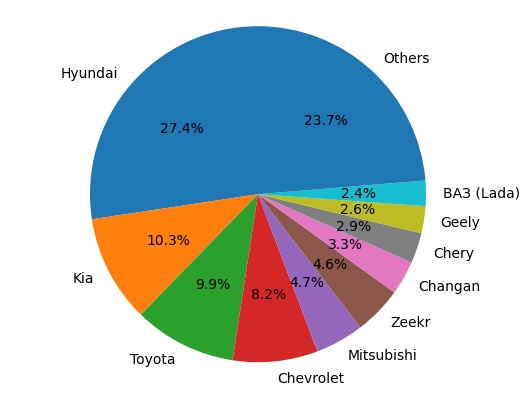

In [25]:
brand_counts = df['brand'].value_counts()
top10_brands = brand_counts[:10]
other_brands = brand_counts[10:]

data = list(top10_brands.index)
data.append('Others')

values = list(top10_brands.values)
values.append(other_brands.values.sum())

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=data, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

In [26]:
df.to_csv('clean_kolesa_dataset_2023.csv')